Airbnb is the biggest short term vacation rental platform in the world, with more than 7 million listings globally. The website allows homeowners to rent out a room or their entire home for a set period of time to travellers. According to Priceonomics, hosts earn an average of $924 per month, nearly 3 times as much as other workers in the gig sharing econonomy. Clearly, hosting on Airbnb can be extremely profitable, however getting the pricing strategy right is important in ensuring that hosts get the most out of their listing. Overpricing the property would result in fewer bookings, while underpricing the property would mean losing out on potential profit. In this project, we analyse Airbnb listing data in Copenhagen to determine the factors that influence Airbnb prices and build a model to predict prices. 

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import glob
import os
import datetime
import dateutil.relativedelta
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline


# Data Cleaning and Feature Engineering

In [6]:
listings = pd.read_csv("listings_cph.csv", encoding='latin-1')
listings.shape


/Users/elleentiong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (43,61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(28196, 106)

In [7]:
listings.head(20)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6983,https://www.airbnb.com/rooms/6983,20200530152033,2020-06-02,Copenhagen 'N Livin',Lovely apartment located in the hip NÃ¸rrebro ...,Beautiful and cosy apartment conveniently loca...,Lovely apartment located in the hip NÃ¸rrebro ...,none,"Nice bars and cozy cafes just minutes away, ye...",...,f,f,moderate,f,f,1,0,1,0,1.28
1,26057,https://www.airbnb.com/rooms/26057,20200530152033,2020-06-02,Lovely house - most attractive area,Our lovely house in the center of the city is ...,Totally charming old 150 m2 stone house from y...,Our lovely house in the center of the city is ...,none,The neighborhood is the most famous one and th...,...,f,f,moderate,f,f,1,1,0,0,0.63
2,26473,https://www.airbnb.com/rooms/26473,20200530152033,2020-06-02,City Centre Townhouse Sleeps 1-12 persons,TOWN HOUSE ON KNABROSTRÃDE - located in the a...,The house is a total of 240sqm divided on 4 fl...,TOWN HOUSE ON KNABROSTRÃDE - located in the a...,none,NaN,...,f,f,moderate,f,f,1,1,0,0,2.50
3,29118,https://www.airbnb.com/rooms/29118,20200530152033,2020-06-02,Best Location in Cool Istedgade,NaN,The apartment is situated in the middle of the...,The apartment is situated in the middle of the...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.18
4,29618,https://www.airbnb.com/rooms/29618,20200530152033,2020-06-03,Artsy and familyfriendly home in lovely Copenh...,"Artsy, bright and spacious flat, close to the ...",It's a three bedroom apartment with a spacious...,"Artsy, bright and spacious flat, close to the ...",none,"The apartment is situated in Ãsterbro, very c...",...,t,f,moderate,f,f,1,1,0,0,0.75
5,31094,https://www.airbnb.com/rooms/31094,20200530152033,2020-06-02,"Very central and cozy, new kitchen",NaN,"Welcome to our home, we hope you will enjoy yo...","Welcome to our home, we hope you will enjoy yo...",none,"What else is nearby? To be honest, I think our...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.14
6,32379,https://www.airbnb.com/rooms/32379,20200530152033,2020-06-02,1668 ft2 artist flat on Vesterbro,Bright Artistic luxury apartment in very trend...,1668 ft2 ft2 bright luxurious apartment with w...,Bright Artistic luxury apartment in very trend...,none,NaN,...,t,f,moderate,f,f,1,1,0,0,0.61
7,32841,https://www.airbnb.com/rooms/32841,20200530152033,2020-06-02,Cozy flat for Adults/Quiet for kids,Our flat is placed in a Central AND Quiet neig...,Welcome to our 3 room 75m2 Home! It's fully f...,Our flat is placed in a Central AND Quiet neig...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.06
8,33850,https://www.airbnb.com/rooms/33850,20200530152033,2020-06-03,Modern Vesterbro Apartmnt w/Balcony,"Spacious 150 m2, 5 room apartment with two bat...","5 room apartment, 150 m2. Big living room with...","Spacious 150 m2, 5 room apartment with two bat...",none,"The location is in Vesterbro, between Istedgad...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.33
9,38524,https://www.airbnb.com/rooms/38524,20200530152033,2020-06-02,Copenhagen studio in Frederiksberg,NaN,Situated in the heart of the leafy Frederiksbe...,Situated in the heart of the leafy Frederiksbe...,none,NaN,...,f,f,flexible,f,f,2,2,0,0,0.14


In [8]:
listings= listings.drop(['listing_url','scrape_id','name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url','last_scraped','host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time','host_response_rate',
 'host_acceptance_rate',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified','street',
 'neighbourhood','city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country','weekly_price',
 'monthly_price',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'calendar_last_scraped','number_of_reviews',
 'number_of_reviews_ltm',
 'first_review',
 'last_review',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'requires_license',
 'license',
 'jurisdiction_names',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'calculated_host_listings_count',
 'calculated_host_listings_count_entire_homes',
 'calculated_host_listings_count_private_rooms',
 'calculated_host_listings_count_shared_rooms',
 'reviews_per_month','neighbourhood_group_cleansed','is_business_travel_ready','square_feet','amenities','is_location_exact'], axis=1)


In [9]:
listings.columns
listings

Index(['id', 'host_is_superhost', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'review_scores_rating', 'instant_bookable',
       'cancellation_policy'],
      dtype='object')

,id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,instant_bookable,cancellation_policy
0,6983,f,Nrrebro,55.68798,12.54571,Apartment,Private room,2,1.0,1.0,...,$368.00,$0.00,$33.00,1,$67.00,2,15,96.0,f,moderate
1,26057,f,Indre By,55.69163,12.57459,House,Entire home/apt,6,1.5,4.0,...,"$2,398.00","$5,000.00","$1,100.00",3,$350.00,3,30,98.0,f,moderate
2,26473,f,Indre By,55.67590,12.57698,House,Entire home/apt,12,2.5,6.0,...,"$3,095.00","$3,727.00",$522.00,1,$0.00,3,31,91.0,f,moderate
3,29118,f,Vesterbro-Kongens Enghave,55.67069,12.55430,Apartment,Entire home/apt,2,1.0,1.0,...,$797.00,NaN,$300.00,1,$0.00,7,14,98.0,f,strict_14_with_grace_period
4,29618,f,sterbro,55.69375,12.56945,Apartment,Entire home/apt,4,1.0,3.0,...,$855.00,NaN,$75.00,1,$0.00,7,31,94.0,t,moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28191,43587401,f,Amager Vest,55.65904,12.59901,Apartment,Entire home/apt,2,1.0,1.0,...,$402.00,NaN,NaN,1,$0.00,2,1125,NaN,t,flexible
28192,43589063,f,Vesterbro-Kongens Enghave,55.66952,12.55269,Apartment,Entire home/apt,4,1.0,2.0,...,"$1,152.00",NaN,NaN,1,$0.00,3,18,NaN,t,flexible
28193,43590787,f,Indre By,55.67871,12.59264,Apartment,Entire home/apt,3,1.5,2.0,...,"$2,003.00",NaN,NaN,1,$0.00,3,1125,NaN,f,flexible
28194,43591487,f,Vesterbro-Kongens Enghave,55.65162,12.55641,Apartment,Entire home/apt,3,1.0,2.0,...,$628.00,NaN,NaN,1,$0.00,5,31,NaN,t,flexible


The listings dataset has 28196 rows and 106 columns. After studying the dataset, 24 columns were retained as these columns provided the most relevant and insightful information. The description of these columns are as follows: 

id: This is the primary key that allows us to identify individual listings

host_is_superhost: Categorical variable - whether or not the host is a superhost

neighbourhood_cleansed: Categorical variable - the neighbourhood where the property is situated 

latitude: Numerical variable - latitude of the property

longitude: Numerical variable - longitude of the property 

property_type: Categorical variable - type of property of the listing, for example apartment, house, condominium etc 

room_type: Categorical variable - entire home, private room, shared room or hotel room 

accommodates: Numerical variable - number of guests the property can accommodate 

bathrooms: Numerical variable - number of bathrooms the property has 

bedrooms: Numerical variable - number of bedrooms the property has 

beds: Numerical variable - number of beds the property has 

bed_type: Categorical variable - real bed, pull-out sofa, futon, couch or airbed 

price: Numerical variable - this is the target variable 

security_deposit: Numerical variable 

cleaning_fee: Numerical variable 

guests_included: Numerical variable - number of extra guests the property can accommodate at additional costs 

extra_people: Numerical variable - amount per night for an extra guest 

minimum_nights: Numerical variable 

maximum_nights: Numerical variable 

review_scores_rating: Numerical variable 

instant_bookable: Categorical variable - true or false 

cancellation_policy: Categorical variable - flexible, moderate, strict 14 with grace period, super strict 60 

There are missing values in 7 columns, which will be filled in below.

In [10]:
listings.isnull().sum(axis = 0)

id                            0
host_is_superhost            10
neighbourhood_cleansed        0
latitude                      0
longitude                     0
property_type                 0
room_type                     0
accommodates                  0
bathrooms                    13
bedrooms                     26
beds                        100
bed_type                      0
price                         0
security_deposit          13669
cleaning_fee               8823
guests_included               0
extra_people                  0
minimum_nights                0
maximum_nights                0
review_scores_rating       5153
instant_bookable              0
cancellation_policy           0
dtype: int64

With the latitude and longitude data of all the listings, we are able to map the location of all the listings and calculate the distance (in kilometres) of all the properties from the most popular tourist spot in Copenhagen, the entertainment and canal district of Nyhavn with coords (55.676098,12.568337). The resulting data was stored in a new column 'distance'. 

In [11]:
from sklearn.neighbors import DistanceMetric

#want to make new column with distance from nyhavn 

gps= listings[['latitude','longitude']] #new dataframe with longitude and latitude only 


In [12]:
#Code from https://stackoverflow.com/questions/51425127/pandas-go-through-2-columns-latitude-and-longitude-and-find-the-distance-bet

import geopy.distance

def calc_distance(row, site_coords):
    station_coords = (row['latitude'], row['longitude'])
    d = geopy.distance.distance(site_coords, station_coords).km
    return(d)

listings['distance'] = listings.apply(calc_distance, site_coords=(55.676098,12.568337), axis=1)

listings

,id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,instant_bookable,cancellation_policy,distance
0,6983,f,Nrrebro,55.68798,12.54571,Apartment,Private room,2,1.0,1.0,...,$0.00,$33.00,1,$67.00,2,15,96.0,f,moderate,1.943172
1,26057,f,Indre By,55.69163,12.57459,House,Entire home/apt,6,1.5,4.0,...,"$5,000.00","$1,100.00",3,$350.00,3,30,98.0,f,moderate,1.773438
2,26473,f,Indre By,55.67590,12.57698,House,Entire home/apt,12,2.5,6.0,...,"$3,727.00",$522.00,1,$0.00,3,31,91.0,f,moderate,0.544210
3,29118,f,Vesterbro-Kongens Enghave,55.67069,12.55430,Apartment,Entire home/apt,2,1.0,1.0,...,NaN,$300.00,1,$0.00,7,14,98.0,f,strict_14_with_grace_period,1.068894
4,29618,f,sterbro,55.69375,12.56945,Apartment,Entire home/apt,4,1.0,3.0,...,NaN,$75.00,1,$0.00,7,31,94.0,t,moderate,1.966551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28191,43587401,f,Amager Vest,55.65904,12.59901,Apartment,Entire home/apt,2,1.0,1.0,...,NaN,NaN,1,$0.00,2,1125,NaN,t,flexible,2.707837
28192,43589063,f,Vesterbro-Kongens Enghave,55.66952,12.55269,Apartment,Entire home/apt,4,1.0,2.0,...,NaN,NaN,1,$0.00,3,18,NaN,t,flexible,1.227023
28193,43590787,f,Indre By,55.67871,12.59264,Apartment,Entire home/apt,3,1.5,2.0,...,NaN,NaN,1,$0.00,3,1125,NaN,f,flexible,1.556349
28194,43591487,f,Vesterbro-Kongens Enghave,55.65162,12.55641,Apartment,Entire home/apt,3,1.0,2.0,...,NaN,NaN,1,$0.00,5,31,NaN,t,flexible,2.826753


'price', 'extra_people', 'cleaning_fee', and 'security_deposit' were manipulated to remove the dollar sign and coma. Missing values in 'beds','bedrooms','review_scores_rating' and 'bathrooms' were filled with the mean value of the respective columns. Missing values in 'cleaning_fee' and 'security_deposit' were filled with 0, under the assumption that these listings do not require a cleaning fee or security deposit. Missing values in 'host_is_superhost' are filled with 'f' as most hosts are not superhosts.

In [13]:
# converting the price column to float from string


listings['price'] = listings['price'].astype(str)  # cast to string

# all the string surgery goes in here
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','')  # assuming ',' is the thousand's separator in your locale
#listings['price'] = listings['price'].replace('%', '')

listings['price'] = listings['price'].astype(float)  # cast back to appropriate type


In [14]:
listings['extra_people'] = listings['extra_people'].astype(str)  # cast to string

# all the string surgery goes in here
listings['extra_people'] = listings['extra_people'].str.replace('$','')
listings['extra_people'] = listings['extra_people'].str.replace(',','')  # assuming ',' is the thousand's separator in your locale
#listings['price'] = listings['price'].replace('%', '')

listings['extra_people'] = listings['extra_people'].astype(float)  # cast back to appropriate type


In [15]:
listings['cleaning_fee'] = listings['cleaning_fee'].astype(str)  # cast to string

# all the string surgery goes in here
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace('$','')
listings['cleaning_fee'] = listings['cleaning_fee'].str.replace(',','')  # assuming ',' is the thousand's separator in your locale
#listings['price'] = listings['price'].replace('%', '')

listings['cleaning_fee'] = listings['cleaning_fee'].astype(float)  # cast back to appropriate type


In [16]:
listings['security_deposit'] = listings['security_deposit'].astype(str)  # cast to string

# all the string surgery goes in here
listings['security_deposit'] = listings['security_deposit'].str.replace('$','')
listings['security_deposit'] = listings['security_deposit'].str.replace(',','')  # assuming ',' is the thousand's separator in your locale
#listings['price'] = listings['price'].replace('%', '')

listings['security_deposit'] = listings['security_deposit'].astype(float)  # cast back to appropriate typ

In [17]:
listings['bedrooms'].fillna((listings['bedrooms'].mean()), inplace=True)
listings['beds'].fillna((listings['beds'].mean()), inplace=True)
listings['review_scores_rating'].fillna((listings['review_scores_rating'].mean()), inplace=True)
listings['cleaning_fee'].fillna(0, inplace=True)
listings['security_deposit'].fillna(0, inplace=True)
listings['bathrooms'].fillna(listings['bathrooms'].mean(), inplace=True)
listings['host_is_superhost'].fillna("f", inplace=True)

In [18]:
listings.isnull().sum(axis = 0)

id                        0
host_is_superhost         0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
price                     0
security_deposit          0
cleaning_fee              0
guests_included           0
extra_people              0
minimum_nights            0
maximum_nights            0
review_scores_rating      0
instant_bookable          0
cancellation_policy       0
distance                  0
dtype: int64

# Exploratory Data Analysis and Data Visualisation 

In [19]:
#y = listings['price'] 
#X = df.drop(['state'], axis=1)
#X=listings
#x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state=4)
# x
# y = target variable


#x_train
#x_test

#y_train
#y_test

In [20]:
listings.describe()

print("The average number of visitors an accommodation can accommodate is {0:,.0f} people.".format(listings.accommodates.mean()))
print("The average number of bathrooms an accommodation has is {0:,.0f}.".format(listings.bathrooms.mean()))
print("The average number of bedrooms an accommodation has is {0:,.0f}.".format(listings.bedrooms.mean()))
print("The average number of beds an accommodation has is {0:,.0f}.".format(listings.beds.mean()))


print("The average number of guests an accommodation can take is {0:,.0f} people.".format(listings.accommodates.mean()))
print("")

print("On average, guests are required to book an accommodation for a minimum of {0:,.0f} nights.".format(listings.minimum_nights.mean()))


print("The average distance of an accommodation to Nyhavn is {0:,.0f} kms.".format(listings.distance.mean()))

print("The median price for a one night stay is {0:,.0f} DKK.".format(listings.price.median()))


,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,distance
count,2.819600e+04,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000,28196.000000
mean,2.019341e+07,55.680770,12.557821,3.312136,1.074407,1.550621,2.038902,849.242694,747.296141,211.084835,1.524152,64.197936,3.769435,621.304547,95.146726,2.716680
std,1.207811e+07,0.019082,0.031626,1.632963,0.282709,1.063448,1.439573,1069.846009,2473.644644,249.754999,1.066216,125.983740,16.157458,553.353480,6.171719,1.341641
min,6.983000e+03,55.615930,12.453970,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,20.000000,0.032190
25%,9.939113e+06,55.666370,12.539830,2.000000,1.000000,1.000000,1.000000,497.000000,0.000000,0.000000,1.000000,0.000000,2.000000,15.000000,94.000000,1.621929
50%,1.942203e+07,55.682225,12.554525,3.000000,1.000000,1.000000,2.000000,702.000000,0.000000,150.000000,1.000000,0.000000,3.000000,1125.000000,96.000000,2.636144
75%,2.996627e+07,55.696080,12.579722,4.000000,1.000000,2.000000,3.000000,998.000000,0.000000,300.000000,2.000000,100.000000,4.000000,1125.000000,100.000000,3.609573
max,4.359172e+07,55.732360,12.639800,16.000000,10.000000,101.000000,25.000000,69172.000000,35210.000000,4000.000000,16.000000,2024.000000,1100.000000,9999.000000,100.000000,8.168598


The average number of visitors an accommodation can accommodate is 3 people.
The average number of bathrooms an accommodation has is 1.
The average number of bedrooms an accommodation has is 2.
The average number of beds an accommodation has is 2.
The average number of guests an accommodation can take is 3 people.

On average, guests are required to book an accommodation for a minimum of 4 nights.
The average distance of an accommodation to Nyhavn is 3 kms.
The median price for a one night stay is 702 DKK.


Only 10.3% are superhosts, however the average prices set by superhosts are only slightly higher than non-superhosts.

In [21]:
#host_is_superhost, neighbourhood_cleansed, property_type , room_type, bed type , cancellation policy 

listings['host_is_superhost'].value_counts()
listings['host_is_superhost'].value_counts(normalize=True)

f    25288
t     2908
Name: host_is_superhost, dtype: int64

f    0.896865
t    0.103135
Name: host_is_superhost, dtype: float64

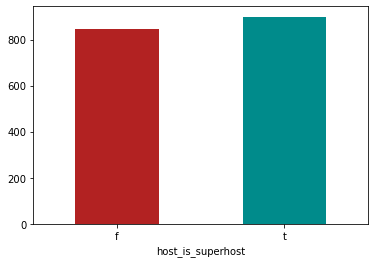

In [22]:
graph1 = listings.groupby('host_is_superhost').price.mean().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=0)

The largest percentage of properties are situated in Nørrebro, closely followed by Vesterbro-Kongens Enghave and Indre By. Indre By properties had the highest median price out of all the neighbourhoods, while Bispebjerg had the lowest. 

In [23]:
listings['neighbourhood_cleansed'].value_counts()
listings['neighbourhood_cleansed'].value_counts(normalize=True)

Nrrebro                      5119
Vesterbro-Kongens Enghave    4396
Indre By                     3758
Frederiksberg                3300
sterbro                      2969
Amager Vest                  2550
Amager st                    2130
Bispebjerg                   1440
Valby                        1229
Vanlse                        763
Brnshj-Husum                  542
Name: neighbourhood_cleansed, dtype: int64

Nrrebro                      0.181551
Vesterbro-Kongens Enghave    0.155909
Indre By                     0.133281
Frederiksberg                0.117038
sterbro                      0.105299
Amager Vest                  0.090438
Amager st                    0.075543
Bispebjerg                   0.051071
Valby                        0.043588
Vanlse                       0.027061
Brnshj-Husum                 0.019223
Name: neighbourhood_cleansed, dtype: float64

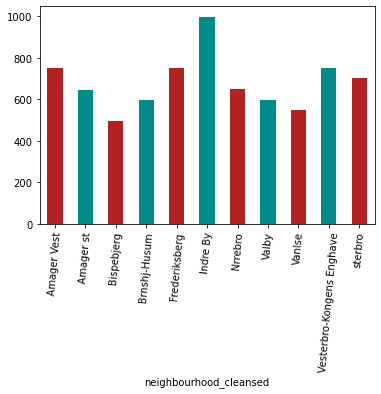

In [24]:
graph1 = listings.groupby('neighbourhood_cleansed').price.median().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=85)

Apartments are by far the most common property type, consisting of 83.8% of all properties. However, compared to other property types, apartments have relatively lower prices. Travellers on a budget may consider living at a earth house, the cheapest property type available. The most common room type is entire home/ apartment and unsurprisingly, the most example rooms are hotel rooms. 

In [25]:
listings['property_type'].value_counts()
listings['property_type'].value_counts(normalize=True)

Apartment                 23669
Condominium                1667
House                      1346
Townhouse                   542
Serviced apartment          329
Loft                        228
Villa                       188
Hostel                       26
Guesthouse                   21
Houseboat                    21
Boat                         20
Bungalow                     20
Guest suite                  20
Hotel                        19
Bed and breakfast            19
Other                        14
Tiny house                   14
Cabin                         9
Boutique hotel                5
Cottage                       4
Hut                           4
Aparthotel                    2
Barn                          2
Lighthouse                    1
Farm stay                     1
Casa particular (Cuba)        1
Earth house                   1
Island                        1
Camper/RV                     1
Tent                          1
Name: property_type, dtype: int64

Apartment                 0.839445
Condominium               0.059122
House                     0.047737
Townhouse                 0.019223
Serviced apartment        0.011668
Loft                      0.008086
Villa                     0.006668
Hostel                    0.000922
Guesthouse                0.000745
Houseboat                 0.000745
Boat                      0.000709
Bungalow                  0.000709
Guest suite               0.000709
Hotel                     0.000674
Bed and breakfast         0.000674
Other                     0.000497
Tiny house                0.000497
Cabin                     0.000319
Boutique hotel            0.000177
Cottage                   0.000142
Hut                       0.000142
Aparthotel                0.000071
Barn                      0.000071
Lighthouse                0.000035
Farm stay                 0.000035
Casa particular (Cuba)    0.000035
Earth house               0.000035
Island                    0.000035
Camper/RV           

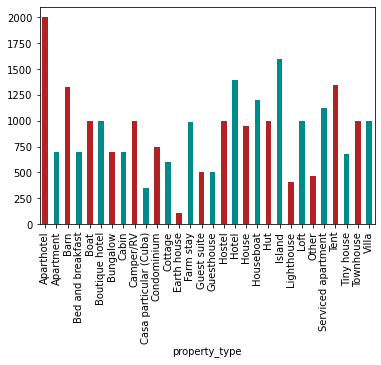

In [26]:
graph1 = listings.groupby('property_type').price.median().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=90)

In [27]:
listings['room_type'].value_counts()
listings['room_type'].value_counts(normalize=True)

Entire home/apt    23737
Private room        4343
Shared room           78
Hotel room            38
Name: room_type, dtype: int64

Entire home/apt    0.841857
Private room       0.154029
Shared room        0.002766
Hotel room         0.001348
Name: room_type, dtype: float64

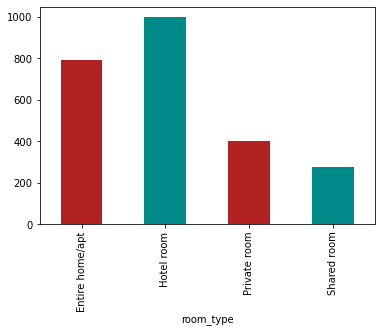

In [28]:
graph1 = listings.groupby('room_type').price.median().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=90)

In [29]:
listings['bed_type'].value_counts()
listings['bed_type'].value_counts(normalize=True)

Real Bed         27814
Pull-out Sofa      206
Futon               93
Couch               46
Airbed              37
Name: bed_type, dtype: int64

Real Bed         0.986452
Pull-out Sofa    0.007306
Futon            0.003298
Couch            0.001631
Airbed           0.001312
Name: bed_type, dtype: float64

In [30]:
listings['cancellation_policy'].value_counts()
listings['cancellation_policy'].value_counts(normalize=True)

flexible                       12071
moderate                        8858
strict_14_with_grace_period     6986
super_strict_60                  281
Name: cancellation_policy, dtype: int64

flexible                       0.428110
moderate                       0.314158
strict_14_with_grace_period    0.247766
super_strict_60                0.009966
Name: cancellation_policy, dtype: float64

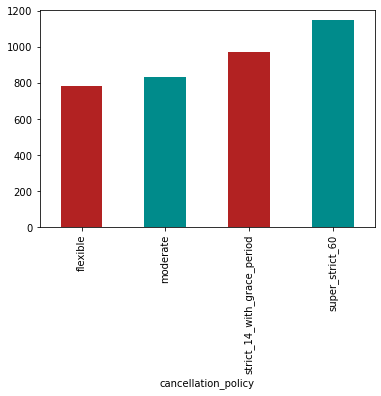

In [31]:
graph1 = listings.groupby('cancellation_policy').price.mean().plot(kind='bar', color=['firebrick', 'darkcyan'], rot=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1259e0c10>,
      dtype=object)

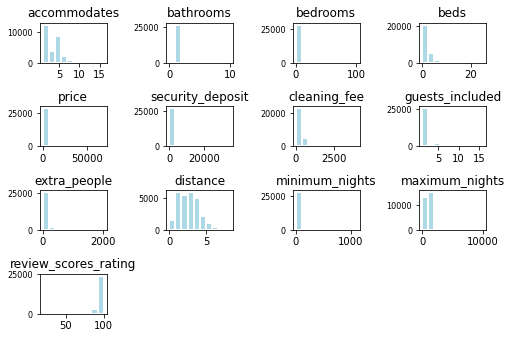

In [32]:
new_x_train= listings[['accommodates', 'bathrooms', 'bedrooms','beds','price','security_deposit','cleaning_fee','guests_included','extra_people','distance','minimum_nights','maximum_nights','review_scores_rating']].copy()
new_x_train.hist(bins=10, color='lightblue',edgecolor='white', linewidth=2.0,
          xlabelsize=10, ylabelsize=8, grid=False)   
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

The density plot for price shows the highest density around 3000 DKK, with the density gradually decreasing up until 10000 DKK. There is a small peak near 70,000 DKK, suggesting that there are outliers in the dataset. 

Text(0.5, 0, 'Price per night (DKK)')

Text(0, 0.5, 'Frequency')

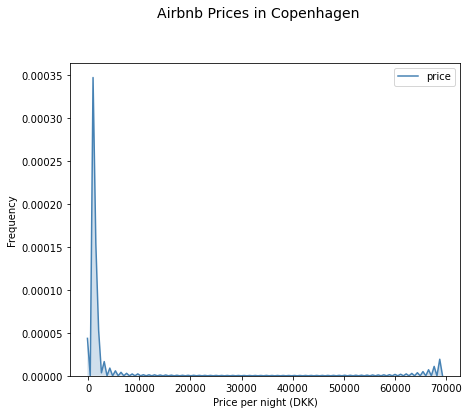

In [33]:
# Density Plot
fig = plt.figure(figsize = (7, 6))
title = fig.suptitle("Airbnb Prices in Copenhagen", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,1, 1)
ax1.set_xlabel("Price per night (DKK)")
ax1.set_ylabel("Frequency") 
sns.kdeplot(listings['price'], ax=ax1, shade=True, color='steelblue')


In [34]:
calendar = pd.read_csv("calendar.csv")

Vacation rental prices often fluctuate depending on the month or season. In Europe, peak season usually occur in the summer, during the months of June to August. Low season is usually defined as November through March, when the weather is cold and dark. Here, we will analyse the calendar data to determine when the peak and low seasons in Copenhagen are. One year's worth of data is kept in this analysis, starting from July 2020 up until June 2021. All dates are manipulated and converted to reflect the month and year only. The average price per night for each month is obtained and plotted onto a line graph. 

In [35]:
#Give credit here 

#calendar = calendar[calendar.Date > pd.to_datetime('2020-07-13')]


start_date = "2020-07-01"
end_date = "2021-06-30"

after_start_date = calendar["date"] >= start_date
before_end_date = calendar["date"] <= end_date
between_two_dates = after_start_date & before_end_date
calendar = calendar.loc[between_two_dates]


calendar = calendar.drop(['available','price','minimum_nights','maximum_nights'], axis=1)


calendar['adjusted_price'] = calendar['adjusted_price'].astype(str)  # cast to string

# all the string surgery goes in here
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$','')
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace(',','')  # assuming ',' is the thousand's separator in your locale
#listings['price'] = listings['price'].replace('%', '')

calendar['adjusted_price'] = calendar['adjusted_price'].astype(float)  # cast back to appropriate type


calendar['date'] = calendar.date.str.replace(r'(^.*2020-07-.*$)', 'July 2020')
calendar['date'] = calendar.date.str.replace(r'(^.*2020-08-.*$)', 'August 2020')
calendar['date'] = calendar.date.str.replace(r'(^.*2020-09-.*$)', 'September 2020')
calendar['date'] = calendar.date.str.replace(r'(^.*2020-10-.*$)', 'October 2020')
calendar['date'] = calendar.date.str.replace(r'(^.*2020-11-.*$)', 'November 2020')
calendar['date'] = calendar.date.str.replace(r'(^.*2020-12-.*$)', 'December 2020')
calendar['date'] = calendar.date.str.replace(r'(^.*2021-01-.*$)', 'January 2021')
calendar['date'] = calendar.date.str.replace(r'(^.*2021-02-.*$)', 'February 2021')
calendar['date'] = calendar.date.str.replace(r'(^.*2021-03-.*$)', 'March 2021')
calendar['date'] = calendar.date.str.replace(r'(^.*2021-04-.*$)', 'April 2021')
calendar['date'] = calendar.date.str.replace(r'(^.*2021-05-.*$)', 'May 2021')
calendar['date'] = calendar.date.str.replace(r'(^.*2021-06-.*$)', 'June 2021')




In [36]:

monthly_avg=calendar.groupby('date').adjusted_price.mean()

#monthly_avg.rename(columns={'date': 'month'}, inplace=True)

month_price_avg = monthly_avg.reindex(index=['July 2020', 'August 2020', 'September 2020', 'October 2020', 'November 2020', 'December 2020', 'January 2021',
                                                'February 2021', 'March 2021', 'April 2021', 'May 2021', 'June 2021'])

prices = list(month_price_avg)
month_price_avg_df = pd.DataFrame(month_price_avg.index, prices)
month_price_avg_df.columns= ['month']


month_price_avg_df.reset_index(inplace=True)

month_price_avg_df.columns = ['avg_price', 'month']

month_price_avg_df = month_price_avg_df[['month', 'avg_price']]
print(month_price_avg_df)



             month   avg_price
0        July 2020  853.854725
1      August 2020  852.931625
2   September 2020  850.401569
3     October 2020  857.372407
4    November 2020  864.417251
5    December 2020  873.045245
6     January 2021  868.897036
7    February 2021  869.215356
8       March 2021  870.305972
9       April 2021  874.762171
10        May 2021  877.274638
11       June 2021  967.366196


The graph below shows that prices were lowest in July and August 2020, and gradually increases as the months go on. There is a sharp increase from April 2021 until June 2021. The low prices in July/ August 2020 reflect the coronavirus pandemic, as the pandemic brought a halt to the tourism industry and subsequently, demand for Airbnb rooms. The prices increase around November/ December, as tourists usually travel to Copenhagen to visit its Christmas markets. The peak in April to June 2021 is due to the summer season. Hence, during normal times, hosts should price their listings higher during the middle of the year. 

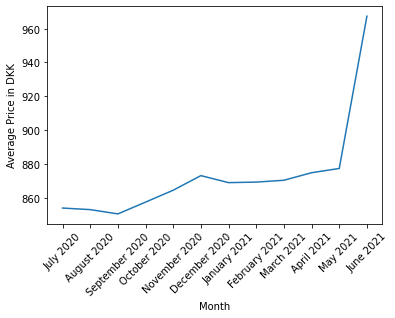

In [37]:
plt.plot(month_price_avg_df.month, month_price_avg_df.avg_price);
plt.xticks(rotation=45);
plt.xlabel("Month");
plt.ylabel("Average Price in DKK");

# Predictive Analysis

In [51]:
#x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=4)
#corr_matrix = listings.corr()
#corr_matrix["price"].sort_values(ascending=False)
# Correlation Matrix Heatmap
#f, ax = plt.subplots(figsize=(13, 13))
#corr = listings.corr()
#hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
              #   linewidths=.05)
#f.subplots_adjust(top=0.93)
#t= f.suptitle('Airbnb Listings Attributes Correlation Heatmap', fontsize=14)


price                                1.000000
accommodates                         0.280766
bedrooms                             0.218339
beds                                 0.213351
cleaning_fee                         0.185065
                                       ...   
neighbourhood_cleansed_Bispebjerg   -0.060745
neighbourhood_cleansed_Nrrebro      -0.062284
property_type_Apartment             -0.085692
distance                            -0.111282
room_type_Private room              -0.144150
Name: price, Length: 74, dtype: float64

In [52]:
#concat_df = pd.concat([x_train , x_test])
listings = pd.get_dummies(listings)

#features_df = pd.get_dummies(concat_df)
y = listings['price'] 
df = listings.drop(['price'], axis=1)
#X = features_df

In [40]:
x = df
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 4)

x_train.shape
x_test.shape

(22556, 73)

(5640, 73)

In [69]:
#from sklearn.preprocessing import OneHotEncoder

#features = ['accommodates',"bedrooms","beds","cleaning_fee"]

One-hot encoding was performed on the dataset to convert categorical variables to integer data. The 'price' column was dropped from the dataset as it is the target variable. The dataset was then split into training and testing sets, with a test size of 20%. A Random Forest Regressor gave a mean absolute of 282.849, while XGBoosting model performed slightly better and gave a mean absolute error of 277.725.

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import metrics
from math import sqrt
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred[:10])
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))  

RandomForestRegressor()

[ 606.19  475.99 1063.9   337.55  850.26 1733.95  445.93  441.62  720.05
  635.36]
Mean Absolute Error: 282.8488546099291


In [68]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))  

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Mean Absolute Error: 277.7257688410739


# References

https://priceonomics.com/how-much-are-people-making-from-the-sharing/

https://stackoverflow.com/questions/51425127/pandas-go-through-2-columns-latitude-and-longitude-and-find-the-distance-bet

